In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [25]:
results_df = pd.read_csv('/mnt/data2/datasets_lfay/MedImageInsights/Visualization/Data/Extended_MIMIC__CheXpert__and_VinDR_Results.csv')



NameError: name 'results_df_extended' is not defined

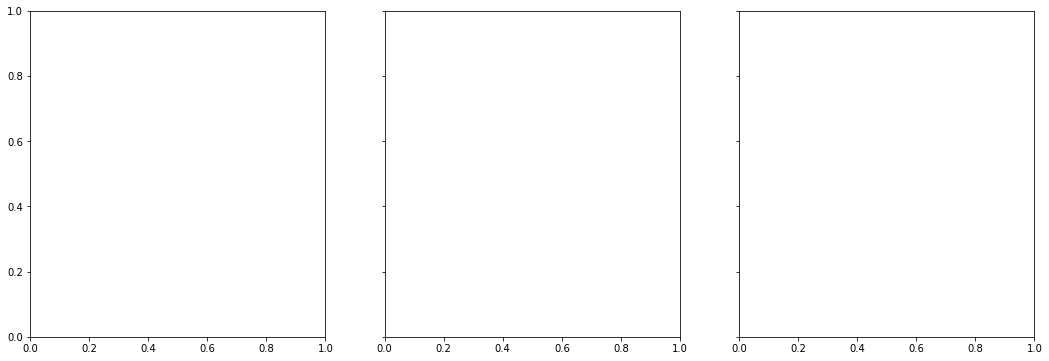

In [26]:
# Creating a plot for MIMIC, CheXpert, and VinDR results

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for MIMIC
for method in results_df_extended["Method"].unique():
    method_data = results_df_extended[results_df_extended["Method"] == method]
    axes[0].plot(
        method_data["Percentage"].to_numpy(),
        method_data["MIMIC (All)"].to_numpy(),
        marker='o',
        label=method
    )
axes[0].set_title("Performance on MIMIC Dataset (All)", fontsize=14)
axes[0].set_xlabel("Training Data Percentage", fontsize=12)
axes[0].set_ylabel("Performance (%)", fontsize=12)
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_xticks([0.01, 0.1, 0.5, 0.8, 1])
axes[0].set_xticklabels(["1%", "10%", "50%", "80%", "100%"])

# Plot for CheXpert
for method in results_df_extended["Method"].unique():
    method_data = results_df_extended[results_df_extended["Method"] == method]
    axes[1].plot(
        method_data["Percentage"].to_numpy(),
        method_data["CheXpert (All)"].to_numpy(),
        marker='o',
        label=method
    )
axes[1].set_title("Performance on CheXpert Dataset (All)", fontsize=14)
axes[1].set_xlabel("Training Data Percentage", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_xticks([0.01, 0.1, 0.5, 0.8, 1])
axes[1].set_xticklabels(["1%", "10%", "50%", "80%", "100%"])

# Plot for VinDR
for method in results_df_extended["Method"].unique():
    method_data = results_df_extended[results_df_extended["Method"] == method]
    axes[2].plot(
        method_data["Percentage"].to_numpy(),
        method_data["VinDR (All)"].to_numpy(),
        marker='o',
        label=method
    )
axes[2].set_title("Performance on VinDR Dataset (All)", fontsize=14)
axes[2].set_xlabel("Training Data Percentage", fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].set_xticks([0.01, 0.1, 0.5, 0.8, 1])
axes[2].set_xticklabels(["1%", "10%", "50%", "80%", "100%"])

plt.tight_layout()
plt.show()


In [17]:

# Function to create modular plots with VTE comparison
def create_plots_with_vte(df, metrics, datasets, vte_data, y_label="Performance (%)", figsize=(16, 5)):
    """
    Create modular plots for specified metrics and datasets with VTE comparison.
    
    Parameters:
    df (pd.DataFrame): The data frame containing the data.
    metrics (list): List of metrics to plot (e.g., ["All", "No Finding", "Pneumonia"]).
    datasets (list): List of datasets to plot (e.g., ["MIMIC", "CheXpert", "VinDR"]).
    vte_data (dict): Dictionary containing VTE comparison data.
    figsize (tuple): Figure size.
    """
    num_plots = len(datasets)
    fig, axes = plt.subplots(1, num_plots, figsize=figsize, sharey=True)
    colors = [ '#007C92', '#FEC51D', '#620059', '#E98300', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = [ '#F6C2C2', '#E44949', '#691010', 'gray', '#F6C2C2']

    for i, dataset in enumerate(datasets):
        for j,method in enumerate(df["Method"].unique()):
            method_data = df[df["Method"] == method]
            axes[i].plot(
                method_data["Percentage"].to_numpy(),
                method_data[f"{dataset} ({metrics[0]})"].to_numpy(),
                marker='o',
                label=method,
                color=colors[j]
            )
        # Add VTE comparison data as a horizontal line
        vte_value = vte_data[metrics[0]][datasets.index(dataset)]
        axes[i].axhline(y=vte_value, color='#8C1515', linestyle='--', label='ZS (Ensemble)')

        if metrics[0] == "All":
            axes[i].set_title(f"Performance on {dataset} Dataset (ACC)", fontsize=16, fontweight='bold')
        elif metrics[0] == "No Finding":
            axes[i].set_title(f"Performance on {dataset} Dataset (TNR)", fontsize=16, fontweight='bold')  
        elif metrics[0] == "Pneumonia":
            axes[i].set_title(f"Performance on {dataset} Dataset (TPR)", fontsize=16, fontweight='bold')
        else:
            axes[i].set_title(f"Performance on {dataset} Dataset ({metrics[0]})", fontsize=16, fontweight='bold')
        axes[i].set_xlabel("Training Data Percentage", fontsize=16, fontweight='bold')
        if i == 0:
            axes[i].set_ylabel(y_label, fontsize=16, fontweight='bold')
          

        axes[i].legend(loc='lower right', fontsize=14)
        axes[i].grid(True, linestyle='--', alpha=0.6)
        axes[i].set_xticks([0.01, 0.1, 0.5, 0.8, 1])
        axes[i].set_xticklabels(["1%", "10%", "50%", "80%", "100%"], fontsize=16)

    plt.tight_layout()
    plt.show()

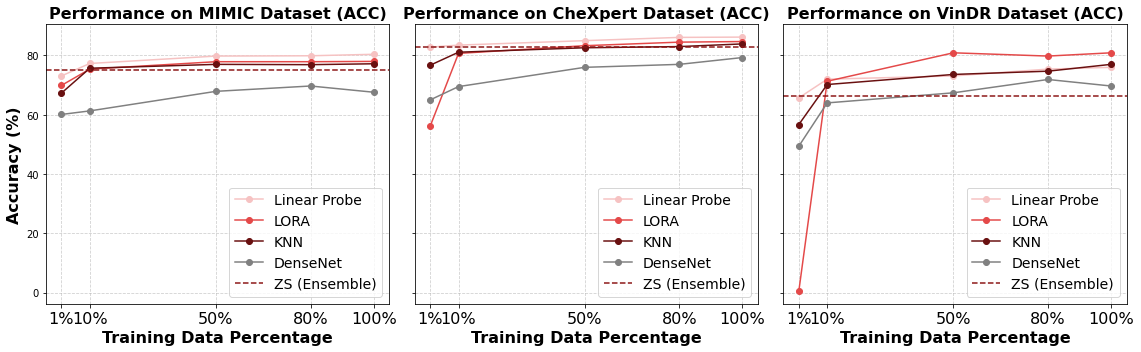

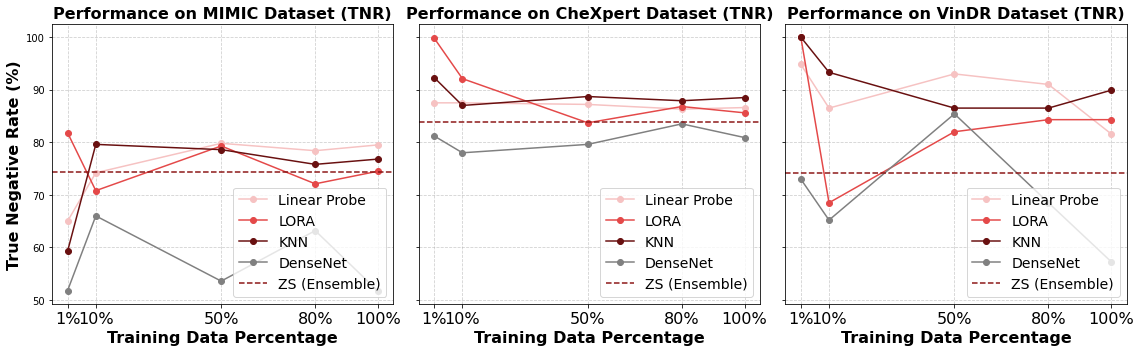

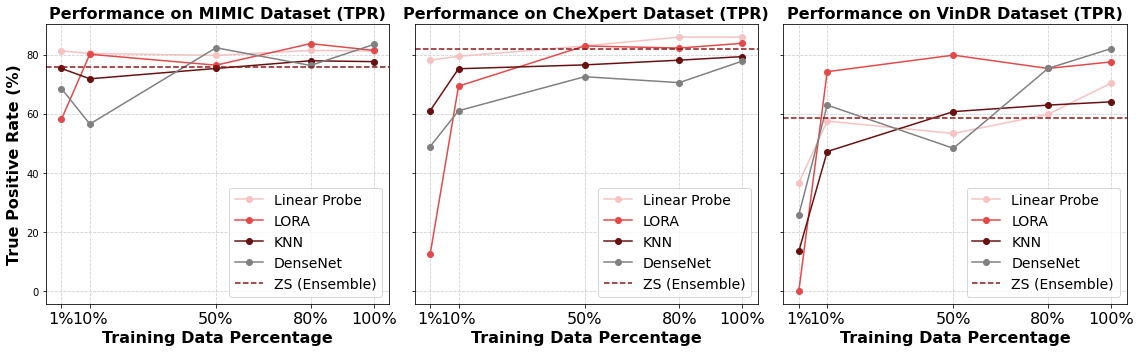

In [18]:
import matplotlib.pyplot as plt

# Adding the VTE comparison data to the existing plots
vte_data = {
    "Dataset": ["MIMIC", "CheXpert", "VinDR"],
    "All": [75.1, 82.9, 66.3],
    "No Finding": [74.4, 83.9, 74.2],
    "Pneumonia": [75.8, 82.0, 58.4]
}



create_plots_with_vte(
    df=results_df,
    metrics=["All"],  # You can replace "All" with "No Finding" or "Pneumonia"
    datasets=["MIMIC", "CheXpert", "VinDR"],
    vte_data=vte_data,
    y_label="Accuracy (%)",
)

create_plots_with_vte(
    df=results_df,
    metrics=["No Finding"],  # You can replace "All" with "No Finding" or "Pneumonia"
    datasets=["MIMIC", "CheXpert", "VinDR"],
    vte_data=vte_data,
    y_label="True Negative Rate (%)",
)

create_plots_with_vte(
    df=results_df,
    metrics=["Pneumonia"],  # You can replace "All" with "No Finding" or "Pneumonia"
    datasets=["MIMIC", "CheXpert", "VinDR"],
    vte_data=vte_data,
    y_label="True Positive Rate (%)",
)



In [5]:
mcc_df = pd.read_csv('/mnt/data2/datasets_lfay/MedImageInsights/Visualization/Data/MCC_Values_DataFrame.csv')

In [ ]:
mcc_df

,Percentage,Method,MIMIC (MCC),CheXpert (MCC),VinDR (MCC)
0,0.01,Linear Probe,0.468184,0.658918,0.386134
1,0.10,Linear Probe,0.547052,0.671206,0.459757
2,0.50,Linear Probe,0.595000,0.701649,0.504457
3,0.80,Linear Probe,0.598269,0.722006,0.534691
4,1.00,Linear Probe,0.607088,0.725018,0.522346
5,0.01,LORA,0.410701,0.251067,0.000000
6,0.10,LORA,0.511216,0.630610,0.427695
7,0.50,LORA,0.557234,0.666021,0.618150
8,0.80,LORA,0.561793,0.690731,0.598429
9,1.00,LORA,0.560335,0.694112,0.619434


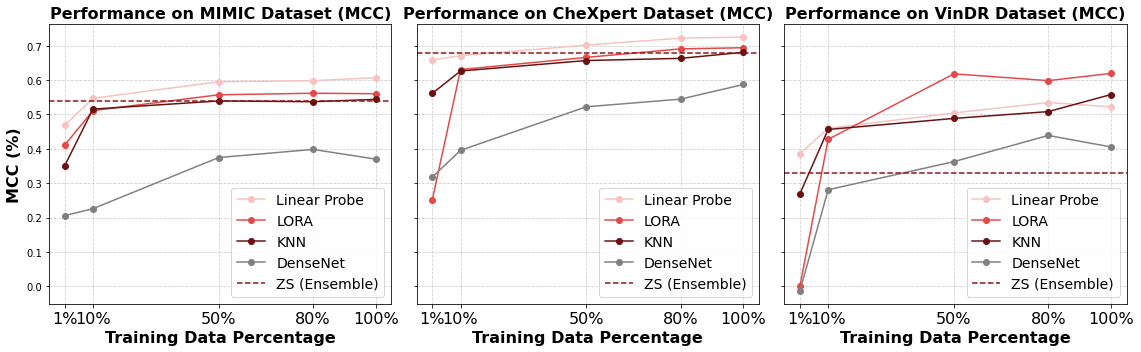

In [19]:
# Adding the VTE comparison data to the existing plots
vte_data = {
    "Dataset": ["MIMIC", "CheXpert", "VinDR"],
    "MCC": [0.54, 0.68, 0.33],

}



create_plots_with_vte(
    df=mcc_df,
    metrics=["MCC"],  # You can replace "All" with "No Finding" or "Pneumonia"
    datasets=["MIMIC", "CheXpert", "VinDR"],
    vte_data=vte_data,
    y_label="MCC (%)",
)

In [8]:
mimic_mcc = [0.52, 0.57, 0.54]
chexpert_mcc = [0.58, 0.62, 0.68]
vindr_mcc = [0.42, 0.28, 0.35]

In [27]:
mimic_avg_template = [0.31, 0.52, 0.43, 0.34, 0.1]
mimic_avg_report = [0.57, 0.56, 0.5, 0.5]
mimic_avg_ensemble = [0.53, 0.53,0.54]
mimic_avg_finetuning = [0.56, 0.56, 0.57]

print(mimic_avg_template, mimic_avg_report, mimic_avg_ensemble)
mimic_avg = [mimic_avg_template, mimic_avg_report, mimic_avg_ensemble, mimic_avg_finetuning]

[0.31, 0.52, 0.43, 0.34, 0.1] [0.57, 0.56, 0.5, 0.5] [0.53, 0.53, 0.54]


In [28]:
chexpert_avg_template = [0.38, 0.58, 0.42, 0.43, 0.42]
chexpert_avg_report = [0.52, 0.53,0.59, 0.59]
chexpert_avg_report_mimic = [0.61, 0.62, 0.5, 0.5]
chexpert_avg_ensemble = [0.66, 0.68, 0.67]
chexpert_avg_finetuning = [0.70,0.69,0.71]
print(chexpert_avg_template, chexpert_avg_report, chexpert_avg_report_mimic, chexpert_avg_ensemble)
chexpert_avg = [chexpert_avg_template, chexpert_avg_report_mimic, chexpert_avg_ensemble, chexpert_avg_finetuning]

[0.38, 0.58, 0.42, 0.43, 0.42] [0.52, 0.53, 0.59, 0.59] [0.61, 0.62, 0.5, 0.5] [0.66, 0.68, 0.67]


In [29]:
vindr_avg_template = [0.22,0.4,0.42,0.37,0]
vindr_avg_report = [0.27,0.28,0.19,0.2]
vindr_avg_ensemble = [0.27, 0.35, 0.33]
vindr_avg_ensemble_all = [0.27, 0.15, 0.15, 0.35, 0.11, 0.12, 0.33, 0.17, 0.12]
vindr_avg_finetuning = [0.65, 0.65, 0.53]
print(vindr_avg_template, vindr_avg_report, vindr_avg_ensemble)
vindr_avg = [vindr_avg_template, vindr_avg_report, vindr_avg_ensemble, vindr_avg_finetuning]
print(np.mean(vindr_avg_ensemble_all))


[0.22, 0.4, 0.42, 0.37, 0] [0.27, 0.28, 0.19, 0.2] [0.27, 0.35, 0.33]
0.19666666666666666


/tmp/ipykernel_2847965/3093699243.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(methods, fontsize=16)


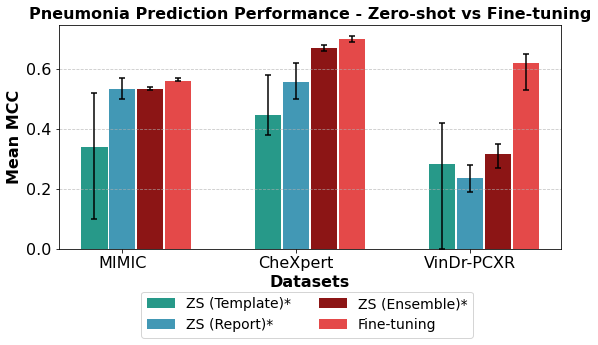

In [30]:
# Calculate means, mins, and maxs for each bar group
mimic_means = [np.mean(mimic_avg[0]), np.mean(mimic_avg[1]), np.mean(mimic_avg[2]), np.mean(mimic_avg[3])]
mimic_mins = [np.min(mimic_avg[0]), np.min(mimic_avg[1]), np.min(mimic_avg[2]), np.min(mimic_avg[3])]
mimic_maxs = [np.max(mimic_avg[0]), np.max(mimic_avg[1]), np.max(mimic_avg[2]), np.max(mimic_avg[3])]

chexpert_means = [np.mean(chexpert_avg[0]), np.mean(chexpert_avg[1]), np.mean(chexpert_avg[2]), np.mean(chexpert_avg[3])]
chexpert_mins = [np.min(chexpert_avg[0]), np.min(chexpert_avg[1]), np.min(chexpert_avg[2]), np.min(chexpert_avg[3])]
chexpert_maxs = [np.max(chexpert_avg[0]), np.max(chexpert_avg[1]), np.max(chexpert_avg[2]), np.max(chexpert_avg[3])]

vindr_means = [np.mean(vindr_avg[0]), np.mean(vindr_avg[1]), np.mean(vindr_avg[2]), np.mean(vindr_avg[3])]
vindr_mins = [np.min(vindr_avg[0]), np.min(vindr_avg[1]), np.min(vindr_avg[2]), np.min(vindr_avg[3])]
vindr_maxs = [np.max(vindr_avg[0]), np.max(vindr_avg[1]), np.max(vindr_avg[2]), np.max(vindr_avg[3])]

# Labels and datasets
methods = ['MIMIC', 'CheXpert', 'VinDr-PCXR']

# Bar width and positions
x = np.arange(len(methods))  # the label locations
width = 0.15  # the width of the bars
color = ['#279989', '#4298B5', '#8C1515', '#E44949']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars for each dataset
bars1 = ax.bar(x - width - 0.01, [mimic_means[0], chexpert_means[0], vindr_means[0]], width, label='ZS (Template)*', color=color[0])
bars2 = ax.bar(x, [mimic_means[1], chexpert_means[1], vindr_means[1]], width, label='ZS (Report)*', color=color[1])
bars3 = ax.bar(x + width + 0.01, [mimic_means[2], chexpert_means[2], vindr_means[2]], width, label='ZS (Ensemble)*', color=color[2])
bars4 = ax.bar(x + 2*width + 0.02, [0.56, 0.70, 0.62], width, label='Fine-tuning', color=color[3])

# Add whiskers for min and max values
method_min = [mimic_mins, chexpert_mins, vindr_mins]
method_max = [mimic_maxs, chexpert_maxs, vindr_maxs]

for i in range(len(methods)):
    # Whiskers for Template
    ax.vlines(x[i] - width - 0.01, method_min[i][0], method_max[i][0], color='black', linewidth=1.5)
    ax.scatter([x[i] - width - 0.01] * 2, [method_min[i][0], method_max[i][0]], color='black', zorder=3, marker='_')

    # Whiskers for Report
    ax.vlines(x[i], method_min[i][1], method_max[i][1], color='black', linewidth=1.5)
    ax.scatter([x[i]] * 2, [method_min[i][1], method_max[i][1]], color='black', zorder=3, marker='_')

    # Whiskers for Ensemble
    ax.vlines(x[i] + width + 0.01, method_min[i][2], method_max[i][2], color='black', linewidth=1.5)
    ax.scatter([x[i] + width + 0.01] * 2, [method_min[i][2], method_max[i][2]], color='black', zorder=3, marker='_')

    # Whiskers for Fine-tuning
    ax.vlines(x[i] + 2*width + 0.02, method_min[i][3], method_max[i][3], color='black', linewidth=1.5)
    ax.scatter([x[i] + 2*width + 0.02] * 2, [method_min[i][3], method_max[i][3]], color='black', zorder=3, marker='_')

# Add labels, title, and legend
ax.set_xlabel('Datasets', fontsize=16, fontweight='bold')
ax.set_ylabel('Mean MCC', fontsize=16, fontweight='bold')
ax.set_title('Pneumonia Prediction Performance - Zero-shot vs Fine-tuning', fontsize=16, fontweight='bold')
ax.set_xticklabels(methods, fontsize=16)
ax.set_xticks(x)
# set font size of y-axis
ax.tick_params(axis='y', labelsize=16)
#ax.legend(fontsize=14, loc='center', bbox_to_anchor=(0.5,0,0,-0.5), ncol=4)
ax.legend(fontsize=14, loc='upper left', ncol=2, bbox_to_anchor=(0.15, -0.16))
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

